## Aula 6 - Filtragem espacial

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Operação de convolução:

Aplicação de um filtro matricial, onde a relação do pixel x' é determinada pelo filtro f com as posições p[x]
assim, f'(x,y) = f(x,y)*FC

In [5]:
a = [0,0,0,0,0,1]
f = [1,2,3]
img = []
for i in range(len(a)+(len(f)-1)):
    m = []
    
    if len((a[0:(i+1)])) < len(f):
        m = [0]*(len(f)-len((a[0:(i+1)])))
        m.extend(a[0:(i+1)])
        
    elif len(a[i+1-len(f):i+1]) < len(f):
        m = a[i-(len(f)-1):]
        m.extend([0]*(len(f)-len(a[i-(len(f)-1):])))
        
    else:
        m = a[i+1-len(f):i+1]
        
    result = 0
    
    for j in range(len(f)):
        result+=m[j]*f[j]
    img.append(result)
        
print(img)

[0, 0, 0, 0, 0, 3, 2, 1]


Filtros: Padrões de matrizes que realizam determinadas mudanças
#### média:

[[1/n,1/n,1/n],

[1/n,1/n,1/n],

[1/n,1/n,1/n]]

para uma matriz nxn. É um filtro de suavização, tornando menor a diferença de intensidade do pixel (x,y) com os vizinhos próximos, recebendo influência dos vizinhos e progagando sua influência.

#### ponderado:

[[1,2,1],

[2,4,2],

[1,2,1]]

O filtro ponderado segue o mesmo principio do filtro de média, porém realizando uma média ponderada, onde o pixel(x,y) é mais influenciado conforme a proximidade com o mesmo. Assim, Pl (x,y) = Med_ponderada(p[n,n]*fp[n,n])

#### Mediana:

Filtro que escolhe um valor central entre o espaço do pixel, subsituindo o pixel(x,y) pela mediana com os valores da matriz.

In [32]:
def mostrar_img(img, title, color = None):
    plt.figure(figsize = (5,5))
    plt.title(title)
    if color == "cinza":
        plt.imshow(img, cmap = "gray",vmin=0, vmax=255)
    else:
        plt.imshow(img)
    plt.show()

In [52]:
def convfilter(filtro,t):
    if filtro == "media":
        return [[1/(t**2)]*t]*t
    

In [49]:
def convolucao(imagem, filtro, tamanho):
    img = [[]*len(imagem[0])]*len(imagem)
    filt = convfilter("media",tamanho)
    
    for i in range(len(imagem)):
        for j in range(len(imagem[0])):
            #pixel [i][j][0]
            pixel = 0
            position = (i-tamanho)/2
            a = 0
            b = 0
            for k in range(tamanho):
                if i + position <0 or i + position > len(imagem) or j+position <0 or j+position > len(imagem[0]):
                    a = 0
                else:
                    a = img[i+position][j+position][0]
                pixel = 
                
            
            break

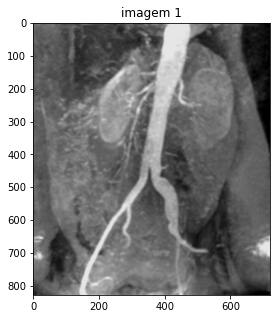

[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]


In [55]:
path = "C:\\Users\\mateus\\Desktop\\processamento_de_imagens\\imagens\\"

img1 = cv2.imread(path+"Fig0312(a)(kidney).tif")
mostrar_img(img1, "imagem 1",color = "gray")
#convolucao(img1,"teste",3)